# Homework #5
#### Aidan Berres
#### Physics 434
#### 11/22/20

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

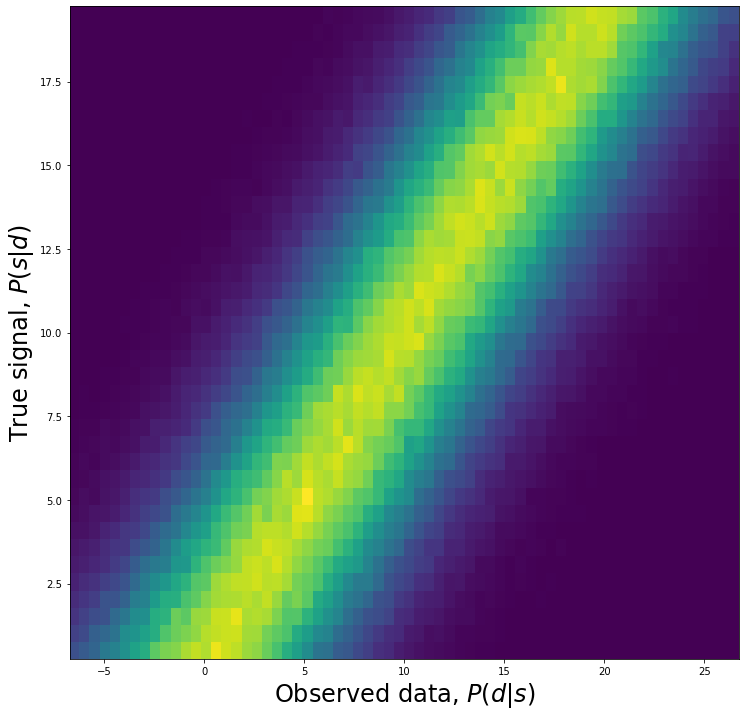

In [10]:
plt.subplots(figsize=(12,12))
bkgd =  stats.norm.rvs(loc=0,scale=4.20,size=int(1e6))
signal = stats.uniform.rvs(loc=0, scale=20, size=1000000)
data = bkgd + signal

signaledges = np.linspace(0,20,40)
dataedges = np.linspace(-7,27,68)

Psd, temp, temp2= np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24);

## 1. b)
Here we are selecting a True injected signal from our observed data probabilities. I am choosing a True injected signal of value 10.

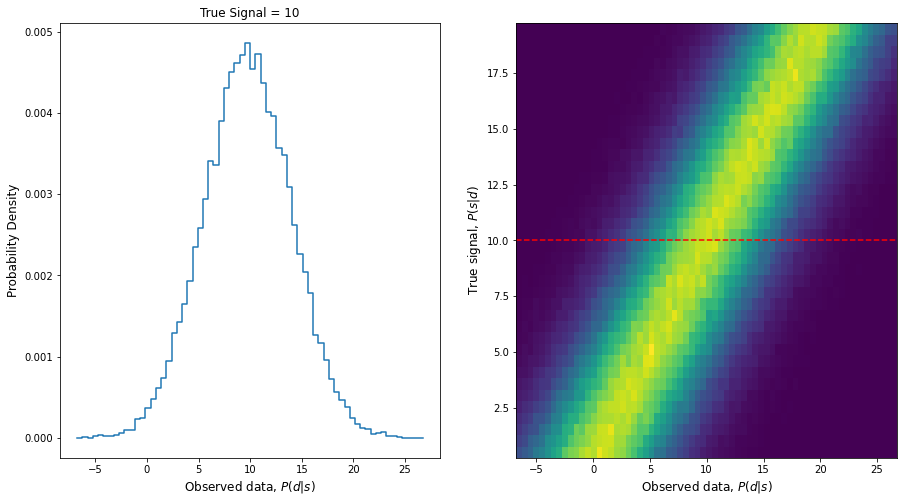

In [109]:
fig,ax=plt.subplots(1,2,figsize=(15,8))
sig=19
pst=Psd.transpose()
ax[1].pcolormesh(datacenters,signalcenters,Psd.T)
ax[0].set_title("True Signal = 10",fontsize=12)
ax[0].set_xlabel('Observed data, $P(d|s)$',fontsize=12)
ax[0].set_ylabel('Probability Density',fontsize=12)
ax[1].set_xlabel('Observed data, $P(d|s)$',fontsize=12)
ax[1].set_ylabel('True signal, $P(s|d)$',fontsize=12)
ax[1].hlines(signalcenters[sig],datacenters.min(),datacenters.max(),color='r',ls='--')
ax[0].step(datacenters,pst[sig]);

What I am plotting is the slice of the original data which is represented by the red horizontal stripe in the plot on the right. We see on the x-axis represents the observed data values and the y-axis represents the probability density of P(d|s).
## 1. c)
Here I am taking an observed data value from our data and plotting P(s|d) for that value. I am choosing an observed data value of around 13.55.

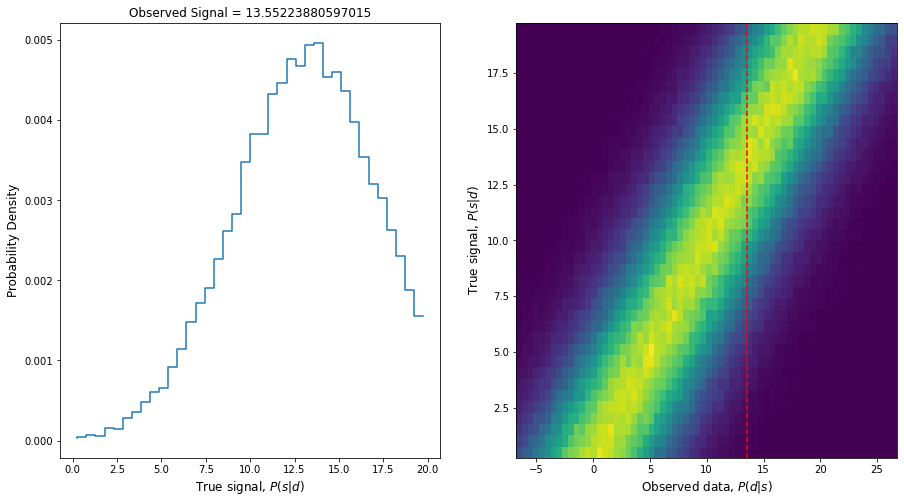

In [102]:
fig,ax=plt.subplots(1,2,figsize=(15,8))
dv=40
#pst=Psd.transpose()
ax[0].set_title(f"Observed Signal = {datacenters[dv]}",fontsize=12)
ax[0].set_xlabel('True signal, $P(s|d)$',fontsize=12)
ax[0].set_ylabel('Probability Density',fontsize=12)
ax[1].set_xlabel('Observed data, $P(d|s)$',fontsize=12)
ax[1].set_ylabel('True signal, $P(s|d)$',fontsize=12)
ax[1].pcolormesh(datacenters,signalcenters,Psd.T)
ax[1].vlines(datacenters[dv],signalcenters.min(),signalcenters.max(),color='r',ls='--')
ax[0].step(signalcenters,Psd[dv]);

This plot represents a slice of the original data which is represented by the red vertical stripe in the rightmost plot. As we can see the x-axis for this plot are the True signal values, and the y-axis represents the probability density of P(s|d). 
## Problem 2
Here we are doing the same thing as before, but with a non-zero mean for my background. I am choosing a non-zero mean of 6.9 for my background. I am showing a representative 2D histogram plot below.

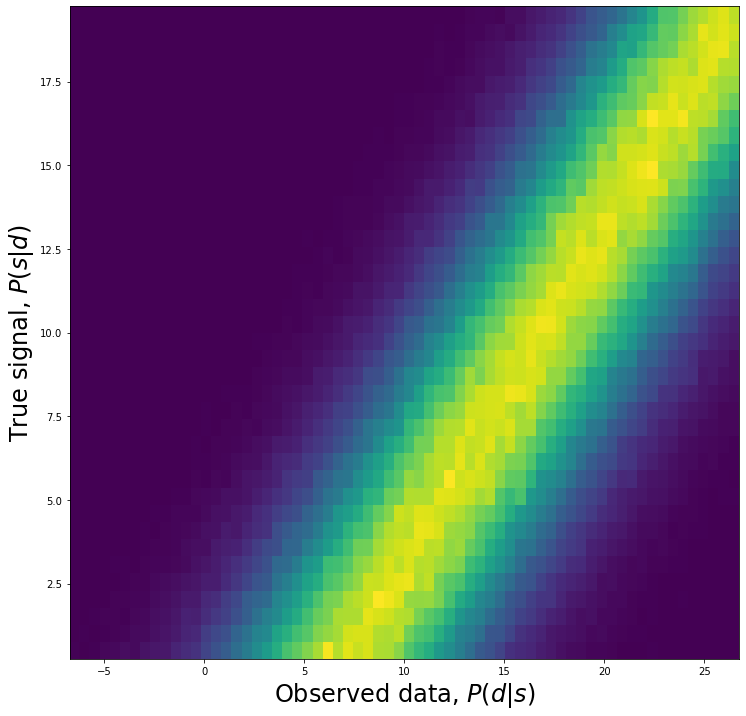

In [96]:
plt.subplots(figsize=(12,12))
bkgd2 =  stats.norm.rvs(loc=6.9,scale=4.20,size=int(1e6))
signal2 = stats.uniform.rvs(loc=0, scale=20, size=1000000)
data2 = bkgd2 + signal2

signaledges2 = np.linspace(0,20,40)
dataedges2 = np.linspace(-7,27,68)

Psd2, temp2, temp22= np.histogram2d(data2,signal2, bins=[dataedges2,signaledges2], density=True)

datacenters2 = (dataedges2[:-1] + dataedges2[1:]) / 2
signalcenters2 = (signaledges2[:-1] + signaledges2[1:]) / 2
plt.pcolormesh(datacenters2,signalcenters2,Psd2.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24);

## 2. b)
Taking a slice with the same value as before 

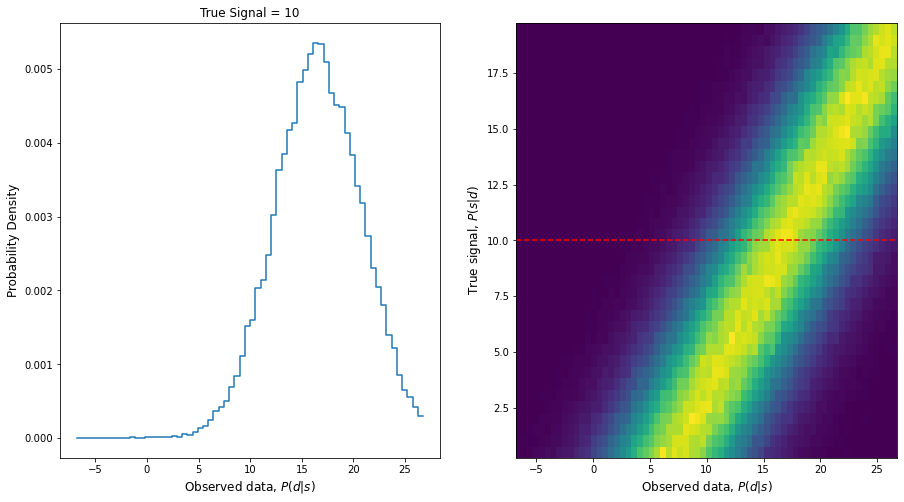

In [108]:
fig,ax=plt.subplots(1,2,figsize=(15,8))
sig=19
pst2=Psd2.transpose()
ax[1].pcolormesh(datacenters2,signalcenters2,Psd2.T)
ax[0].set_title("True Signal = 10",fontsize=12)
ax[0].set_xlabel('Observed data, $P(d|s)$',fontsize=12)
ax[0].set_ylabel('Probability Density',fontsize=12)
ax[1].set_xlabel('Observed data, $P(d|s)$',fontsize=12)
ax[1].set_ylabel('True signal, $P(s|d)$',fontsize=12)
ax[1].hlines(signalcenters2[sig],datacenters2.min(),datacenters2.max(),color='r',ls='--')
ax[0].step(datacenters2,pst2[sig]);

We can see that the plot is very similar to the one from problem 1, but we see that its mode has shifted to around the observed data value of 17 and not 10 like before.
## 2. c)
Taking a slice with the same value as before.


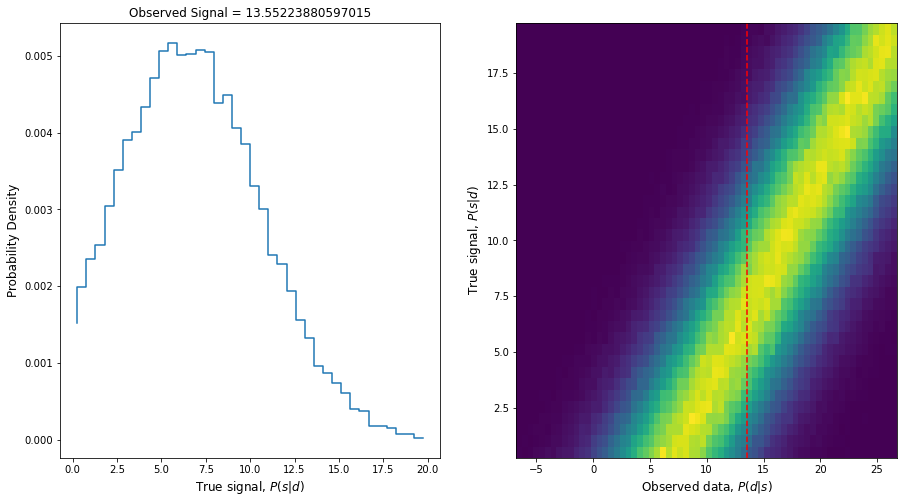

In [105]:
fig,ax=plt.subplots(1,2,figsize=(15,8))
dv = abs(datacenters2 - datacenters[40]).argmin()
#pst=Psd.transpose()
ax[0].set_title(f"Observed Signal = {datacenters2[dv]}",fontsize=12)
ax[0].set_xlabel('True signal, $P(s|d)$',fontsize=12)
ax[0].set_ylabel('Probability Density',fontsize=12)
ax[1].set_xlabel('Observed data, $P(d|s)$',fontsize=12)
ax[1].set_ylabel('True signal, $P(s|d)$',fontsize=12)
ax[1].pcolormesh(datacenters2,signalcenters2,Psd2.T)
ax[1].vlines(datacenters2[dv],signalcenters2.min(),signalcenters2.max(),color='r',ls='--')
ax[0].step(signalcenters2,Psd2[dv]);

We can see that this plot is also similar to the one made for problem 1. The difference is that the mode has shifted to the left from 13 in the original to about 5 in this plot. 
## 2. Overplots

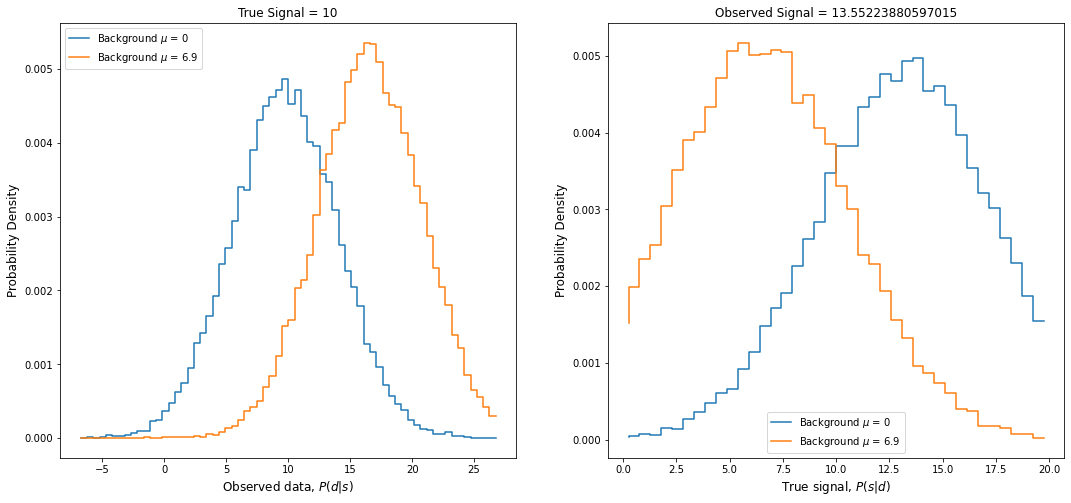

In [114]:
fig, ax = plt.subplots(1,2, figsize=(18,8))
sig=19
dv=40
dv2=abs(datacenters2 - datacenters[40]).argmin()
ax[0].set_xlabel('Observed data, $P(d|s)$',fontsize=12)
ax[0].set_ylabel('Probability Density',fontsize=12)
ax[0].set_title("True Signal = 10",fontsize=12)
ax[0].step(datacenters,pst[sig],label='Background $\mu$ = 0')
ax[0].step(datacenters2,pst2[sig],label='Background $\mu$ = 6.9')
ax[1].set_xlabel('True signal, $P(s|d)$',fontsize=12)
ax[1].set_ylabel('Probability Density',fontsize=12)
ax[1].step(signalcenters,Psd[dv],label='Background $\mu$ = 0');
ax[1].step(signalcenters2,Psd2[dv2],label='Background $\mu$ = 6.9')
ax[1].set_title(f"Observed Signal = {datacenters[dv]}",fontsize=12)
ax[0].legend(loc=0)
ax[1].legend(loc=0);


Since the background data mean has shifted to a value of 6.9 rather than zero, we can see this shift in the plots. We can easily see this in the left plot since we are plotting P(d|s) in which d (the data) is proportional to the background since it is only data = injected signal + background. For the right plot we know that our true injected signal data has not been shifted since it is not proportinal to the background. The reason why these probabilities are shifted is because we are taking a data value from the observed data, which we know is shifted. This results in the seperation of the probability densities for P(s|d) since it is the probability of the true signal given the observed data, which has been shifted.